In [1]:
import os
import torch
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# View data

In [2]:
data_path = os.path.join(os.path.dirname(os.getcwd()), "processed_data", "livecells")
ls_img_path = glob(os.path.join(data_path, "images", "*.npy"))
ls_img_path = sorted(ls_img_path)
n_img = len(ls_img_path)
print(f"Number of images: {n_img}")

Number of images: 1624


In [3]:
ls_mask_path = glob(os.path.join(data_path, "labels", "*.npy"))
ls_mask_path = sorted(ls_mask_path)
n_mask = len(ls_mask_path)
print(f"Number of masks: {n_mask}")

Number of masks: 1624


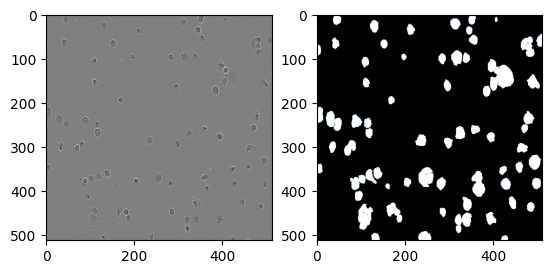

In [4]:
img = np.load(ls_img_path[0])
mask = np.load(ls_mask_path[0])

fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap="bone")
ax[1].imshow(mask, cmap="bone")

In [10]:
import pandas as pd

pd_mask = pd.DataFrame(mask)
pd_mask.describe()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,...,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.000368,0.000528,0.000597,0.000613,0.000613,0.000597,0.000582,0.000582,0.000513,0.000398,...,0.000628,0.000597,0.000528,0.000444,0.000345,0.000222,0.000222,0.000214,0.000207,0.000199
std,0.001144,0.001340,0.001411,0.001425,0.001425,0.001411,0.001396,0.001396,0.001324,0.001186,...,0.001440,0.001411,0.001340,0.001244,0.001111,0.000907,0.000907,0.000893,0.000877,0.000862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922


# Dataset creation

In [104]:
class LiveCellsDataset(torch.utils.data.Dataset):

    def __init__(self, data_path):
        self.data_path = data_path

        # image path
        ls_img_path = glob(os.path.join(data_path, "images", "*.npy"))
        self.ls_img_path = sorted(ls_img_path)

        # mask path
        ls_mask_path = glob(os.path.join(data_path, "labels", "*.npy"))
        self.ls_mask_path = sorted(ls_mask_path)

        # number of items
        self.n_items = len(self.ls_img_path)

    def __len__(self):
        return self.n_items
    
    def __getitem__(self, idx):
        img = np.load(ls_img_path[idx])
        mask = np.load(ls_mask_path[idx])

        img = torch.tensor(img).permute(2, 0, 1)
        mask = torch.tensor(mask).unsqueeze(0)
        return img, mask

In [105]:
data_path = os.path.join(os.path.dirname(os.getcwd()), "processed_data", "livecells")
dataset = LiveCellsDataset(data_path)

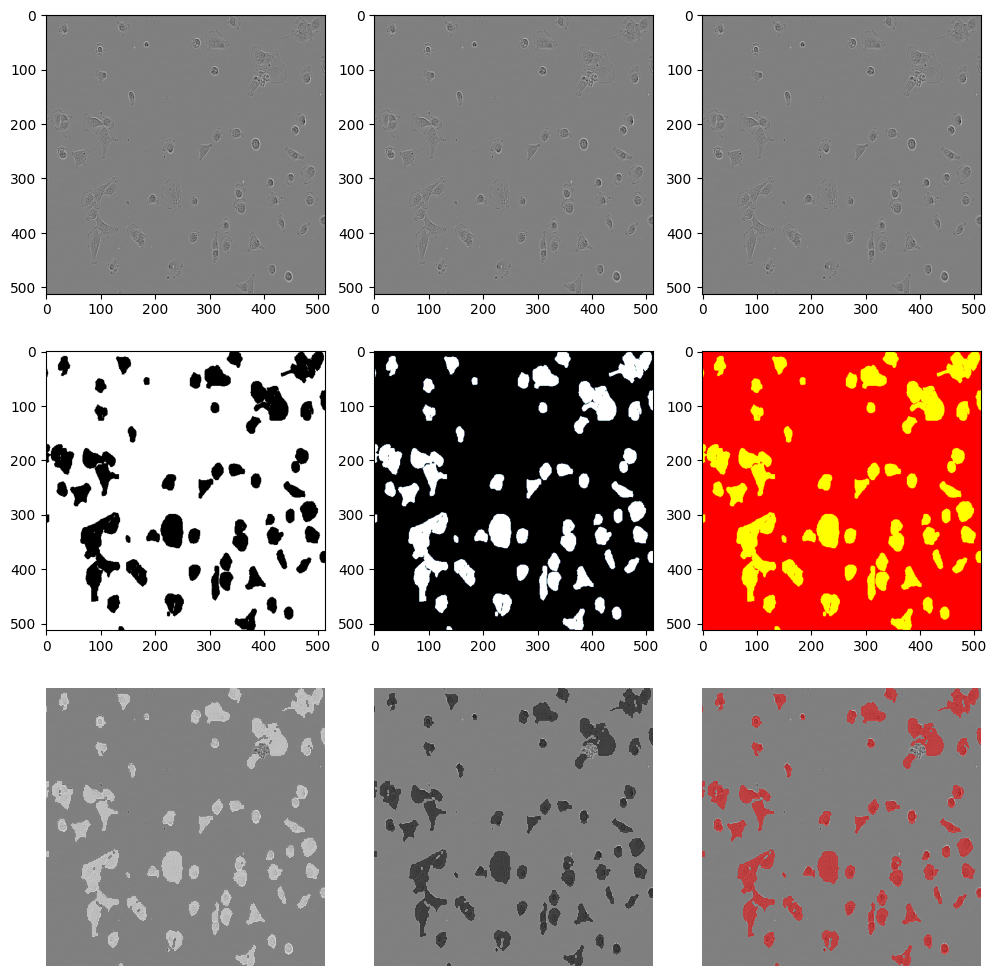

In [70]:
img, mask = dataset[2]
img = img.permute(0, 2, 3, 1)
mask_ = np.ma.masked_where(mask==0, mask)

fig, axis = plt.subplots(3, 3, figsize=(10, 10))

# row 1
axis[0, 0].imshow(img[0], cmap="gist_yarg")
axis[0, 1].imshow(img[0], cmap="bone")
axis[0, 2].imshow(img[0], cmap="autumn")

# row 2
axis[1, 0].imshow(mask[0], cmap="gist_yarg")
axis[1, 1].imshow(mask[0], cmap="bone")
axis[1, 2].imshow(mask[0], cmap="autumn")

# row 3
axis[2, 0].imshow(img[0], cmap="bone")
axis[2, 0].imshow(mask_[0], alpha=0.5, cmap="gist_yarg")
axis[2, 0].axis("off")

axis[2, 1].imshow(img[0], cmap="bone")
axis[2, 1].imshow(mask_[0], alpha=0.5, cmap="bone")
axis[2, 1].axis("off")

axis[2, 2].imshow(img[0], cmap="bone")
axis[2, 2].imshow(mask_[0], alpha=0.5, cmap="autumn")
axis[2, 2].axis("off")

plt.tight_layout()
plt.show()

In [71]:
mask = np.array([0, 1, 0])
mask_ = np.ma.masked_where(mask==0, mask)
mask_

masked_array(data=[--, 1, --],
             mask=[ True, False,  True],
       fill_value=999999)

In [111]:
from torchvision.utils import make_grid
from torch.utils.data import DataLoader

# init loader
torch.manual_seed(101)
train_loader = DataLoader(dataset, batch_size=100, shuffle=True)

# grab first batch of images
for images, masks in train_loader:
    break

grid_img = make_grid(images[:12], nrow=12)
grid_mask = make_grid(masks[:12], nrow=12)
print("Grid images", grid_img.shape)
print("Grid masks", grid_mask.shape)

Grid images torch.Size([3, 516, 6170])
Grid masks torch.Size([3, 516, 6170])


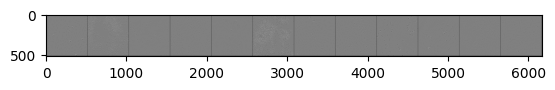

In [91]:
plt.imshow(np.transpose(grid_img.numpy(), (1, 2, 0)));

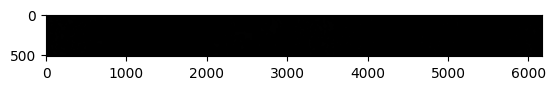

In [107]:
plt.imshow(np.transpose(grid_mask.numpy(), (1, 2, 0)));

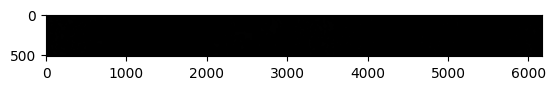

In [116]:
# Convert mask to RGB for visualization (optional, depends on use case)
# You can map each class to a color if needed
masks_rgb = torch.cat([masks, masks, masks], dim=1)  # Convert single channel mask to 3-channel for visualization
grid_mask = make_grid(masks_rgb[:12], nrow=12)

# Convert grid to numpy for plotting
plt.imshow(np.transpose(grid_mask.numpy(), (1, 2, 0)), cmap="bone");

In [118]:
masks.numpy()

array([[[[0.        , 0.        , 0.        , ..., 0.00392157,
          0.00392157, 0.00392157],
         [0.        , 0.        , 0.        , ..., 0.00392157,
          0.00392157, 0.00392157],
         [0.        , 0.        , 0.        , ..., 0.00392157,
          0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.00392157, 0.00392157]]],


       [[[0.        , 0.00392157, 0.00392157, ..., 0.00392157,
          0.00392157, 0.00392157],
         [0.        , 0.00392157, 0.00392157, ..., 0.00392157,
          0.00392157, 0.00392157],
         [0.        , 0.00392157, 0.00392157, ..., 0.00392157,
          0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.00392157, 0

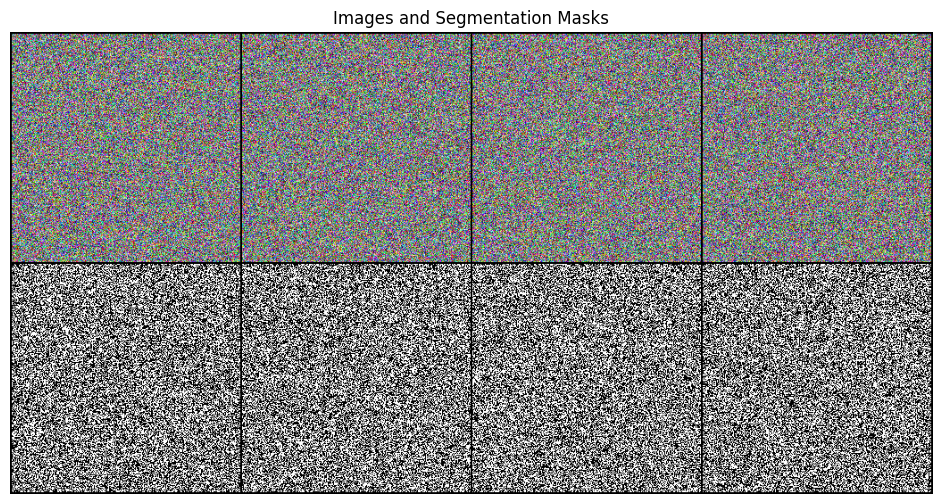

In [109]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
grid_mask.numpy()
# Sample data: batch of images and masks (assumed to be tensors)aaaaaaaaaaaaaaaaaa
# Let's assume the shape of images is [batch_size, channels, height, width]
# and the shape of masks is [batch_size, 1, height, width] (single channel for masks)

# Example image batch (batch_size=4, channels=3, height=256, width=256)
images = torch.rand(4, 3, 256, 256)

# Example mask batch (batch_size=4, channels=1, height=256, width=256)
# The mask values typically represent class labels (e.g., 0 for background, 1 for object)
masks = torch.randint(0, 2, (4, 1, 256, 256), dtype=torch.float32)

# Convert mask to RGB for visualization (optional, depends on use case)
# You can map each class to a color if needed
masks_rgb = torch.cat([masks, masks, masks], dim=1)  # Convert single channel mask to 3-channel for visualization

# Concatenate images and masks along the batch dimension to visualize side by side
combined = torch.cat([images, masks_rgb], dim=0)

# Create grid using make_grid
grid = torchvision.utils.make_grid(combined, nrow=4, padding=2)

# Convert grid to numpy for plotting
np_grid = grid.permute(1, 2, 0).numpy()

# Plot using matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(np_grid)
plt.axis('off')  # Turn off axis
plt.title('Images and Segmentation Masks')
plt.show()
